# **43177 STUTI KUMAR**

# **A3 - Image Classification**

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np

In [ ]:
#grabbing CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
train_images, test_images = train_images.astype("float") / 255.0, test_images.astype("float") / 255.0

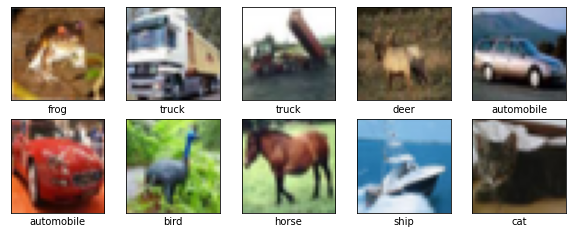

In [ ]:
#showing images of mentioned categories
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
#building CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:



















# model compilation
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
epochs = 10
h = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4996 - accuracy: 0.4550 - val_loss: 1.2407 - val_accuracy: 0.5534
Epoch 2/10
1563/1563 [==============================] - 93s 60ms/step - loss: 1.1352 - accuracy: 0.5991 - val_loss: 1.0616 - val_accuracy: 0.6252
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.9915 - accuracy: 0.6498 - val_loss: 0.9922 - val_accuracy: 0.6506
Epoch 4/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.9030 - accuracy: 0.6823 - val_loss: 0.9314 - val_accuracy: 0.6789
Epoch 5/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.8335 - accuracy: 0.7064 - val_loss: 0.9016 - val_accuracy: 0.6893
Epoch 6/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.7772 - accuracy: 0.7265 - val_loss: 0.9150 - val_accuracy: 0.6905
Epoch 7/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7292 - accuracy: 0.7447 - val_loss: 0.8710 

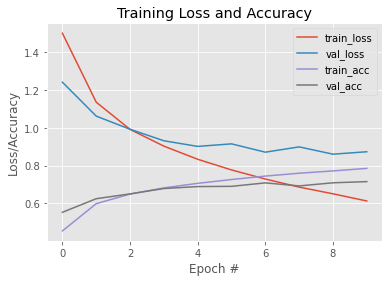

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
def predict(x:int = 0):
        # label mapping
 
        labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
        
        # select the image from our test dataset
        image_number = x
        
        # display the image
        plt.imshow(test_images[image_number])
        
        # load the image in an array
        n = np.array(test_images[image_number])
        
        # reshape it
        p = n.reshape(1, 32, 32, 3)
        
        # pass in the network for prediction and
        # save the predicted label
        predicted_label = labels[model.predict(p).argmax()]
        
        # load the original label

        #original_label = labels[test_labels[image_number]]
        
        # display the result
        #print("Original label is {} and predicted label is {}".format(original_label, predicted_label))
        print("Predicted label is {}".format(predicted_label))

1/1 [==============================] - 0s 22ms/step
Predicted label is ship


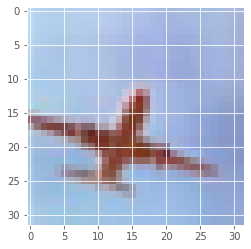

In [ ]:
predict(5722)

1/1 [==============================] - 0s 27ms/step
Predicted label is cat


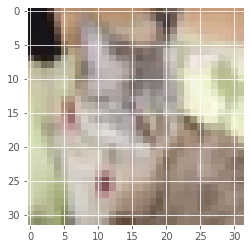

In [ ]:
predict(8)

1/1 [==============================] - 0s 24ms/step
Predicted label is frog


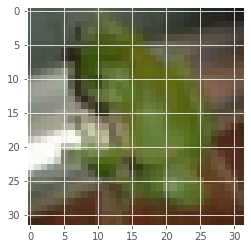

In [ ]:
predict(7)

1/1 [==============================] - 0s 19ms/step
Predicted label is dog


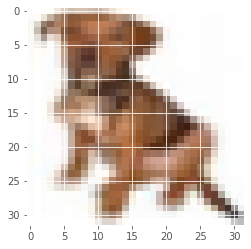

In [ ]:
predict(239)